In [1]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import Dense, Flatten,Lambda,Activation,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# CIFAR10 is a set of 60K images with 32*32 pixels on 3 channels

IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
INPUT_SHAPE = (32,32,3)
#Constants
BATCH_SIZE = 128
NB_EPOCH   = 20
NB_CLASSES = 10
VERBOSE    = 1
VALIDATION_SPLIT = 0.2

(X_train, y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train = np_utils.to_categorical(y_train,NB_CLASSES)
y_test  = np_utils.to_categorical(y_test,NB_CLASSES)

In [6]:
from keras.utils import normalize
X_train = normalize(X_train,axis = 1)
X_test  = normalize(X_test,axis=1)

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 4,200,842
Trainable params: 4,200,842
Non-trainable params: 0
____________________________________________

In [8]:
model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_split=VALIDATION_SPLIT)    

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.8717 - accuracy: 0.3343 - val_loss: 1.6225 - val_accuracy: 0.4386
Epoch 2/20
40000/40000 [==============================] - 43s 1ms/step - loss: 1.5421 - accuracy: 0.4552 - val_loss: 1.6199 - val_accuracy: 0.3999
Epoch 3/20
40000/40000 [==============================] - 46s 1ms/step - loss: 1.3974 - accuracy: 0.5084 - val_loss: 1.3272 - val_accuracy: 0.5344
Epoch 4/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.3034 - accuracy: 0.5432 - val_loss: 1.2616 - val_accuracy: 0.5513
Epoch 5/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.2190 - accuracy: 0.5732 - val_loss: 1.2131 - val_accuracy: 0.5711
Epoch 6/20
40000/40000 [==============================] - 46s 1ms/step - loss: 1.1557 - accuracy: 0.5982 - val_loss: 1.1880 - val_accuracy: 0.5927
Epoch 7/20
40000/40000 [==============================] - 47s 1ms/st

In [37]:
loss,accu = model.evaluate(X_test,y_test)
accu

10000/10000 [==============================] - 2s 240us/step


0.6258999705314636

In [39]:
predictions = model.predict(X_test)

In [41]:
predictions[0]

array([1.3803529e-04, 1.0723376e-05, 1.3139151e-04, 9.7361642e-01,
       1.5951782e-03, 2.4082482e-02, 1.7688630e-05, 3.6047091e-04,
       4.4588029e-05, 3.0609547e-06], dtype=float32)

In [43]:
import numpy as np
pred = np.argmax(predictions[0])
pred

3

In [44]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [45]:
img  = X_test[0]
print(img.shape)

(32, 32, 3)


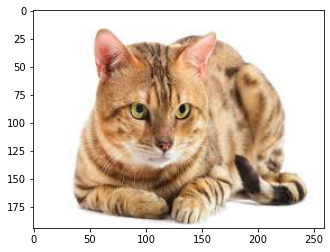

In [10]:
#from PIL import Image
#img = Image.open('cat_image.jpg')
#img.show()

import matplotlib.image as img

image = img.imread('cat_image.jpg')
plt.imshow(image)